In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

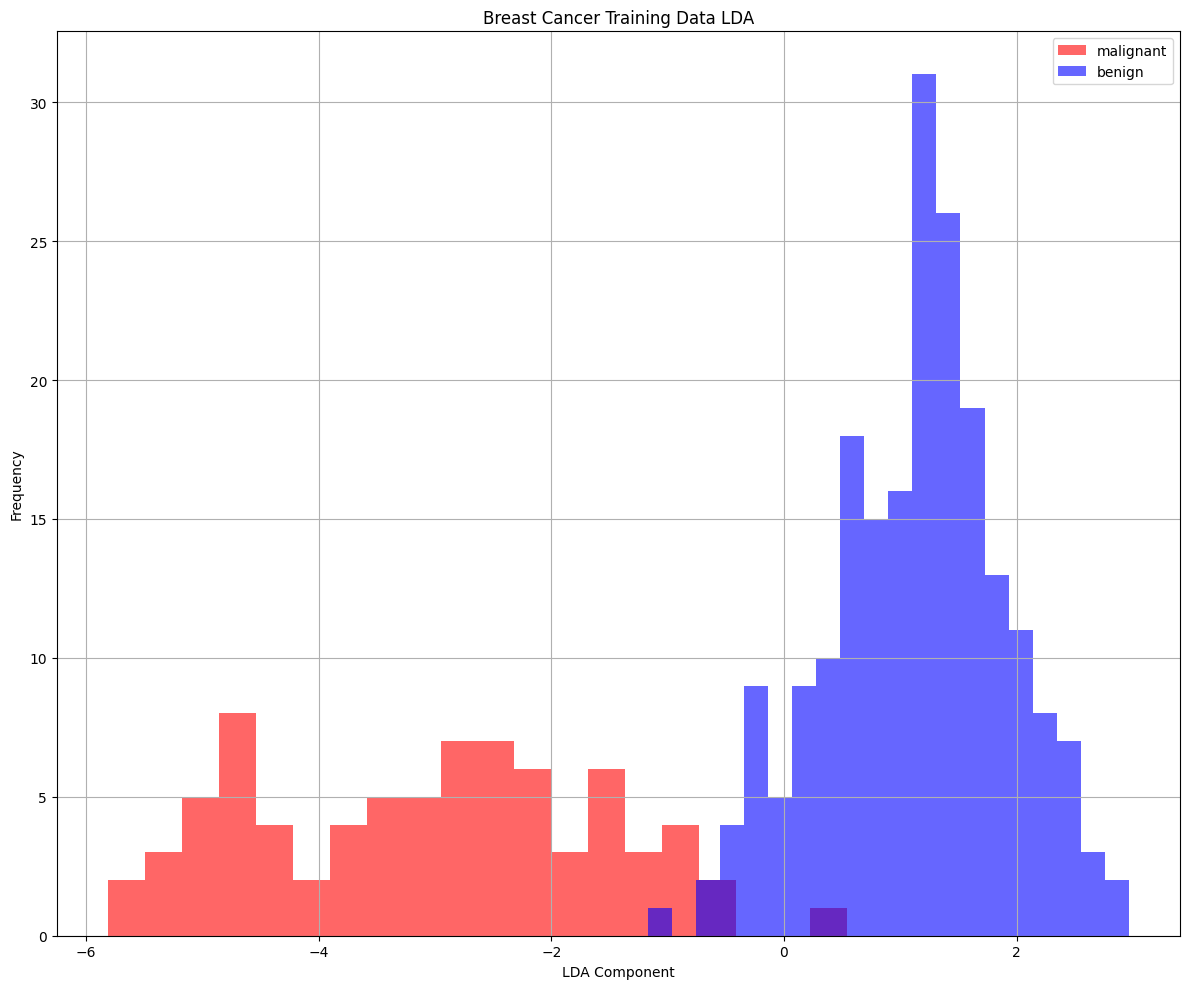

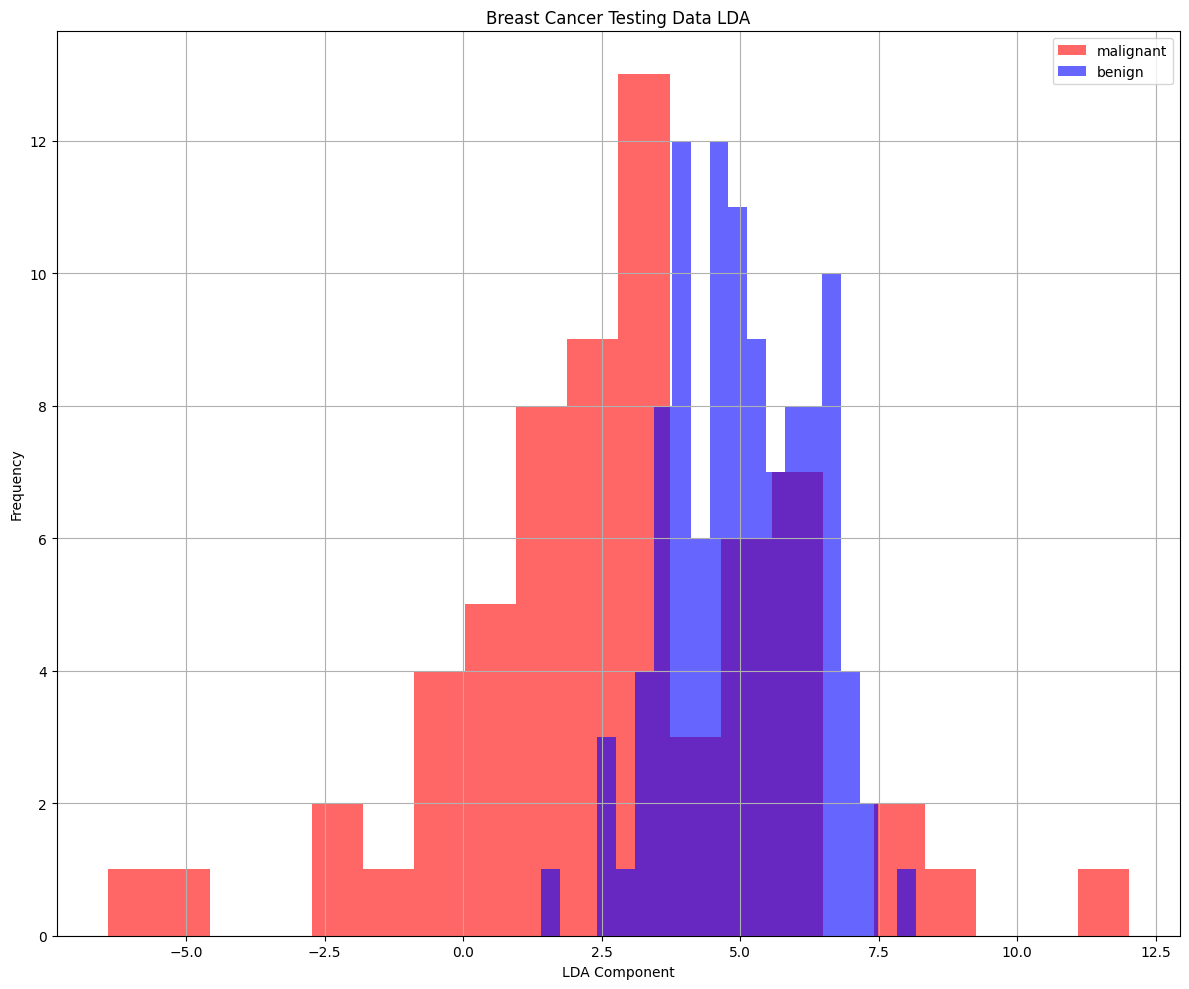

[I 2025-04-27 14:03:21,919] A new study created in memory with name: no-name-b2b63759-d7ff-4b47-8c63-b45d4966971c
[I 2025-04-27 14:04:18,241] Trial 0 finished with value: 0.9894736842105264 and parameters: {'n_estimators': 8761, 'max_depth': 9, 'learning_rate': 0.011361621081317736, 'subsample': 0.6269302445922869, 'colsample_bytree': 0.5541842566540165, 'gamma': 3.25830271869066, 'reg_alpha': 0.0006630970582280444, 'reg_lambda': 1.8088957494147136e-06}. Best is trial 0 with value: 0.9894736842105264.
[I 2025-04-27 14:05:24,666] Trial 1 finished with value: 0.9859649122807017 and parameters: {'n_estimators': 8649, 'max_depth': 13, 'learning_rate': 0.022172522715898625, 'subsample': 0.8020721806225629, 'colsample_bytree': 0.8448246714770706, 'gamma': 2.9795599827523733, 'reg_alpha': 0.0025881716865241732, 'reg_lambda': 5.115862683727553e-05}. Best is trial 0 with value: 0.9894736842105264.
[I 2025-04-27 14:06:00,876] Trial 2 finished with value: 0.9824561403508772 and parameters: {'n_es

Best trial:
Accuracy: 0.989534180278282
Best hyperparameters:  {'n_estimators': 9216, 'max_depth': 8, 'learning_rate': 0.021174117953332454, 'subsample': 0.8531355229776659, 'colsample_bytree': 0.500967090150793, 'gamma': 1.8586761135341165, 'reg_alpha': 1.3271137243859655e-08, 'reg_lambda': 0.19463850650056524}


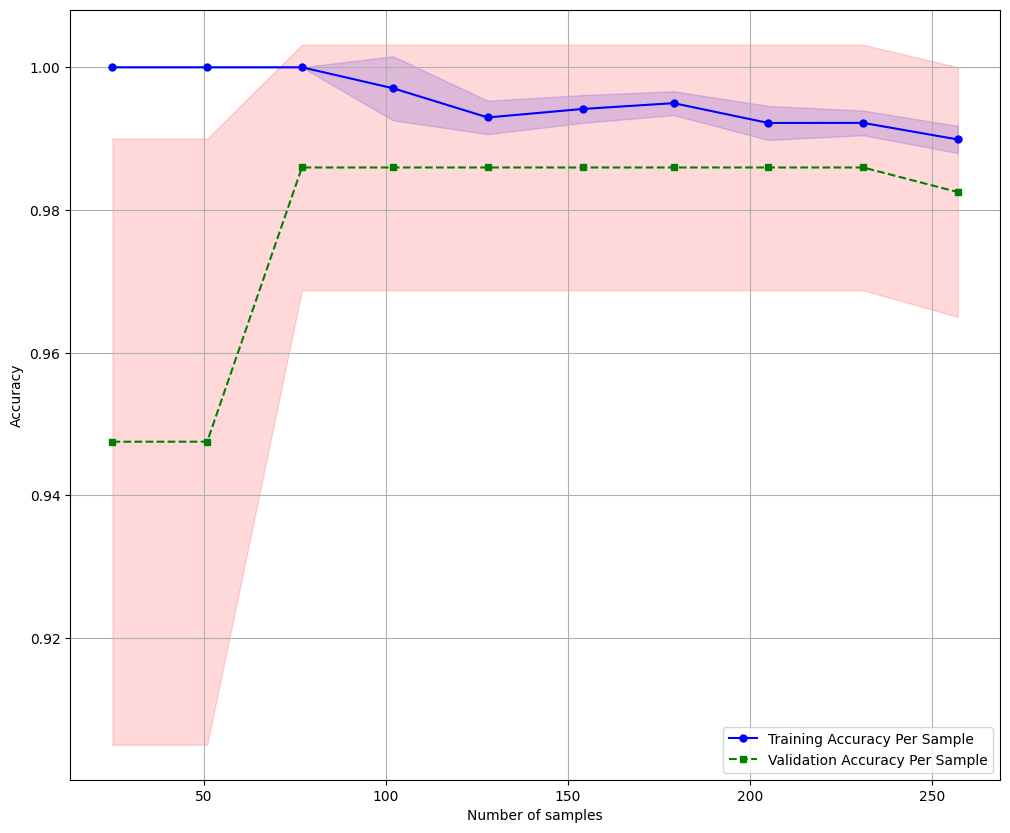

Confusion Matrix
[[  6  58]
 [  0 107]]
Accuracy: 0.6608, Precision: 0.6485, Recall: 1.0000, F1: 0.7868, AUC: 0.5938


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)